(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1eab392e820>)

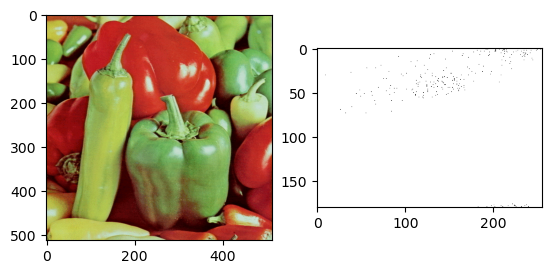

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('peppers_color.tif', cv.IMREAD_COLOR)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

intensity = 20*np.log(1+hist)

plt.subplot(1,2,1), plt.imshow(img[:,:,::-1])

plt.subplot(1,2,2), plt.imshow(intensity, cmap='Greys')


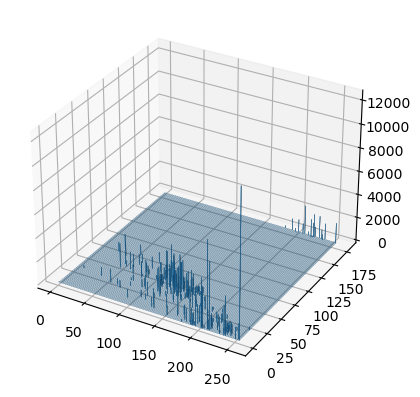

In [18]:
xpos = np.arange(0, hist.shape[1], 1)
ypos = np.arange(0, hist.shape[0], 1)
xpos, ypos = np.meshgrid(xpos + 0.5, ypos + 0.5)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(hist.shape[0] * hist.shape[1])

dx = np.ones(hist.shape[0] * hist.shape[1]) * 0.5
dy = np.ones(hist.shape[0] * hist.shape[1]) * 0.5
dz = hist.flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)